**What is Train/Test**

Train/Test is a method to measure the accuracy of your model.

It is called Train/Test because you split the data set into two sets: a training set and a testing set.

80% for training, and 20% for testing.

You train the model using the training set.

You test the model using the testing set.

Train the model means create the model.

Test the model means test the accuracy of the model.

**Start With a Data Set**

Start with a data set you want to test.

Our data set illustrates 100 customers in a shop, and their shopping habits.

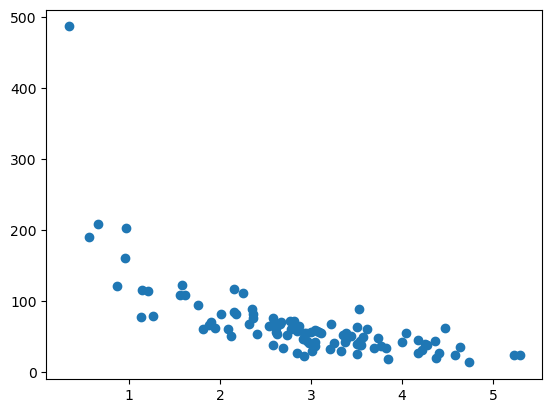

In [1]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

The x axis represents the number of minutes before making a purchase.

The y axis represents the amount of money spent on the purchase.

**Split Into Train/Test**

The training set should be a random selection of 80% of the original data.

The testing set should be the remaining 20%.

In [2]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

Displaying same scatter plot with training set

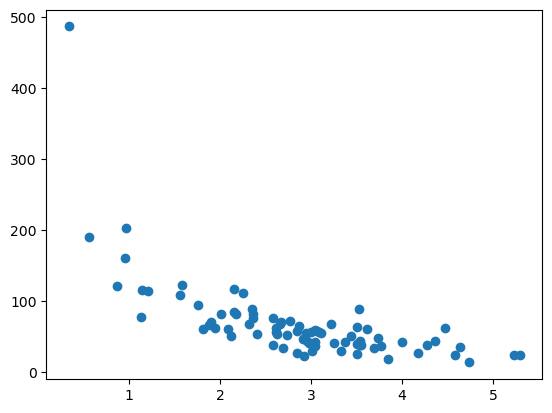

In [3]:
plt.scatter(train_x, train_y)
plt.show()

Dislpaying testing set

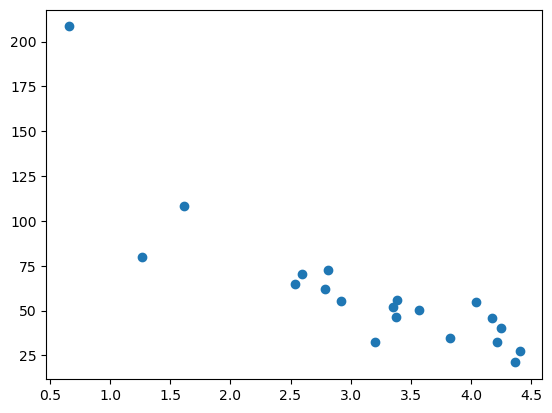

In [4]:
plt.scatter(test_x, test_y)
plt.show()

fitting a polynomial regression line

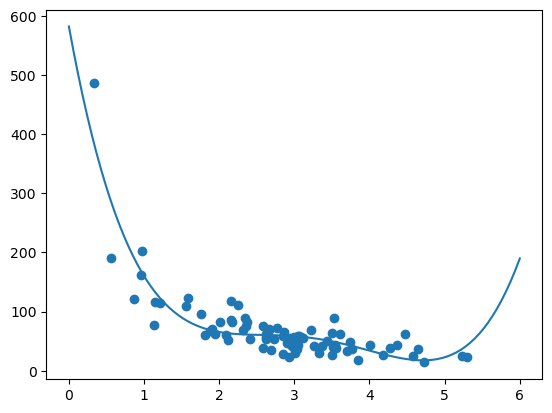

In [5]:
mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

The result can back my suggestion of the data set fitting a polynomial regression, even though it would give us some weird results if we try to predict values outside of the data set. Example: the line indicates that a customer spending 6 minutes in the shop would make a purchase worth 200. That is probably a sign of overfitting.

But what about the R-squared score? The R-squared score is a good indicator of how well my data set is fitting the model.

**R2**
Remember R2, also known as R-squared?

It measures the relationship between the x axis and the y axis, and the value ranges from 0 to 1, where 0 means no relationship, and 1 means totally related.

The sklearn module has a method called r2_score() that will help us find this relationship.

In this case we would like to measure the relationship between the minutes a customer stays in the shop and how much money they spend.

In [7]:
from sklearn.metrics import r2_score

r2 = r2_score(train_y, mymodel(train_x))

print(r2)

0.7988645544629795


The result 0.799 shows that there is a OK relationship.

Now we have made a model that is OK, at least when it comes to training data.

Now we want to test the model with the testing data as well, to see if gives us the same result.

In [8]:
r2 = r2_score(test_y, mymodel(test_x))

print(r2)

0.8086921460343556


 The result 0.809 shows that the model fits the testing set as well, and we are confident that we can use the model to predict future values.

In [13]:
# How much money will a buying customer spend, if she or he stays in the shop for 5 minutes?

print(mymodel(5))

22.879625918116744


The example predicted the customer to spend 22.88 dollars, as seems to correspond to the diagram: